# Shortest Path Problems

*Selected Topics in Mathematical Optimization: 2017-2018*

**Michiel Stock** ([email](michiel.stock@ugent.be))

![](Figures/logo.png)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from shortestpaths import red, blue, green, yellow, orange
from sys import path
# add path of MST to load Tickets to Ride network
path.append('../06.MinimumSpanningTrees')

## Representing graphs in Python (recap)

Graphs are discrete mathematical objects, represented as a tuple $G=(V, E)$ with $V$ the set of vertices (nodes, points) and $E$ the set of edges (links, arcs, lines) that connect the vertices.

Consider for example the graph below.

![A directed unweighted graph](Figures/unweighted_graph.png)

This graph contains five edges: A, B, C, D and E and nine vertices. Since each of the vertices has a direction from one node to another so we call this a **directed graph**.

Like most programming languages, Python does not provide direct support for graphs a data types. Graphs can however be represented by [**dictionaries**](https://docs.python.org/2/tutorial/datastructures.html#dictionaries). Dictionaries in Python store key-value pairs in a way such that accessing, insertion and deletion of new elements can be done very efficiently. The keys will represent the edges, while its associated values is the set of vertices to which depart from this node.

For example, the unweighted graph above is represented bij the following code.

In [2]:
unweighted_graph = {'A' : set(['B']),
                   'B' : set(['C']),
                   'C' : set(['A', 'B', 'E']),
                   'D' : set(['A']),
                   'E' : set(['D', 'D'])  # set data structure only contains unique elements
                   }                     # only one node will be retained

Note that we store the outgoing vertices in a [**set**](https://docs.python.org/2/tutorial/datastructures.html#sets) data structure. This will allow us to perform certain operations faster. Note that of the two vertices starting for E only one is retained. 

In [3]:
unweighted_graph['E']

{'D'}

In this chapter, we will focus on algorithms that process **weighted graphs**, i.e. graphs on which the vertices have a weight. For example:
![A weighted directed graph](Figures/weighted_graph.png)
We will store each vertex now as a tuple containing the weight and the outgoing edge it is connected to. For this example:

In [4]:
weighted_graph = {'A' : set([(3, 'B')]),
                   'B' : set([(2, 'C')]),
                   'C' : set([(6, 'A'), (1, 'B'), (0.3, 'E')]),
                   'D' : set([(9, 'A')]),
                   'E' : set([(2.8, 'D'), (4.1, 'D'), (4.2, 'E')])  # two paths from E -> D
                    }

Storing a weighted vertex as `(weight, outgoing node)` has the advantage that the native `sort()` function in Python can be used to order vertices by weight, something which will be useful in the algorithms we will implement.

## Dijkstra's shortest path algorithm

Dijkstra's algorithm is a popular algorithm to find the shortest path between the nodes of a graph. The algorithm can be used in two ways:

- when both a source and a sink node are provided, the algorithm gives the list of nodes of the shortest path, together with the length (distance of the path).
- when only a source is given, the shortest distance between the source and all (accessable) nodes is returned together with a dictionary representing the tree of the shortest paths between the source and other nodes.

The pseudocode can be found below.

### Pseudocode of Dijkstra's shortest path algorithm
Source: Wikipedia.org
```
1  function Dijkstra(Graph, source, sink (optional)):
2      distance[source] := 0  // initialize a dictionary with distance
3                             // to source
4      for each vertex V in Graph: 
5          if V ≠ source
6              distance[V] := infinity
7      previous := empty dict   // stores the previous node in path
8
10     make empty priority queue Q for vertices to check
11     Q.add_with_priority(source, 0)  # first check the source
12
13
14     while Q is not empty:                     // The main loop
15         get node U with smallest distance from Q
16         if U is the sink (if provided) 
17              break the loop
17         for every neighbor V of U:
18             alternative := distance[U] + dist(U, V)
18             if alternative < distance[V]
19                 distance[V] := alternative
20                 previous[V] := U
21                 Q.add_with_priority(V, alternative)
22
23     if sink is given
24         reconstruct shortest path
25         return shortest path and length of path
26     else
27         return distance, previous
```

### Pseudocode of path reconstruction  algorithm
```
1 function reconstruct_path(previous, source, sink)
2    if the source is not in previous
3          return empty path
4    V := sink   \\ path is reconstructed backwards
5    path := [V]  \\ path is a list of nodes
6    while V is not source
7         V := previous node in path
8         add V in beginning of the path
9    return the path
```

In [5]:
from shortestpaths import dijkstra, reconstruct_path

In [ ]:
from numpy import infty

def dijkstra(graph, source, sink=None):
    """
    Implementation of Dijkstra's shortest path algorithm.

    Inputs:
        - graph : dict representing the weighted graph
        - source : the source node
        - sink : the sink node (optional)

    Ouput:
            - distance : dict with the distances of the nodes to the source
            - previous : dict with for each node the previous node in the
                        shortest path from the source (if one is given)
    """
    # complete the algorithm
    # ...
    # ...
    
    if sink is None:
        return distance, previous
    else:
        return reconstruct_path(previous, source, sink), distance[sink]


In [ ]:
def reconstruct_path(previous, source, sink):
    """
    Reconstruct the path from the output of the Dijkstra algorithm.

    Inputs:
            - previous : a dict with the previous node in the path
            - source : the source node
            - sink : the sink node
    Ouput:
            - the shortest path from source to sink
    """
    if sink not in previous:
        return []
    # ... complete this!
    return path

**Assignment 1: Dijkstra**

1. Complete the implementation for Dijstra's algorithm and the path reconstruction function
2. Find the shortest path from node A to I in the example graph below. Calculate the shortest distance from A to any other node. Compare both running times with `%timeit`.

![Example network](Figures/example_graph.png)

In [6]:
# the above graph as an adjacency list
graph = {'A' : set([(2, 'B'), (3, 'D')]),
        'B' : set([(1, 'C'), (5, 'E')]),
        'C' : set([(2, 'D'), (1, 'E')]),
        'D' : set([(3, 'E')]),
        'E' : set([(2, 'B'), (3, 'F')]),
        'F' : set([(5, 'G'), (8, 'I')]),
        'G' : set([(2, 'H'), (5, 'I')]),
        'H' : set([(3, 'I')]),
        'I' : []}

In [7]:
dijkstra(graph, 'A', 'I')

(['A', 'B', 'C', 'E', 'F', 'I'], 15)

In [8]:
dijkstra(graph, 'A')

({'A': 0, 'B': 2, 'C': 3, 'D': 3, 'E': 4, 'F': 7, 'G': 12, 'H': 14, 'I': 15},
 {'B': 'A',
  'C': 'B',
  'D': 'A',
  'E': 'C',
  'F': 'E',
  'G': 'F',
  'H': 'G',
  'I': 'F'})

In [9]:
%timeit dijkstra(graph, 'A', 'I')

100000 loops, best of 3: 17.6 µs per loop


In [10]:
%timeit dijkstra(graph, 'A')

100000 loops, best of 3: 14.2 µs per loop


## A* shortest path algorithm

It is hard to explain the algorithm into more depth than [here](http://theory.stanford.edu/~amitp/GameProgramming/) and [here](http://www.redblobgames.com/pathfinding/a-star/introduction.html).

The A\* algorithm is exact (like Dijkstra's algorithm), but it can also use a **heuristic** to speed up the search. In each iteration, the next neighbor $v$ of the current vertex that the algorithm considers is chosen based on the heuristic

$$
f(v) = g(v) + h(v)
$$

with $g(v)$ the cost of the path so far and $h(v)$ a heuristic that estimates the cost of the cost of the shortest path from $v$ to the goal. The heuristic $h(v)$ should satify two properties:
1. To guaranty that a shortest path is found, the heuristic should be **admissible**, i.e. it should never overestimate the true distance to goal.
2. Evaluating the heuristic should be cheap (it is either pre-computed or is a function).

So the A\* algorithm is basically the same as Dijkstra's algorithm, but with the main difference that the the latter chooses nodes to explore based on the distance from the starting node, while the latter chooses nodes **based on an estimate of distance to the goal**.

When using A\* to find the shortest path between two physical locations, each vertex corresponds to a point in space. A good heuristic is the (Euclidian) distance between the vertexs, as this will always be a lower bound for the actual distance to travel to the goal.

Consider the following example of finding the path from vertex $a$ to vertex $h$.

![Example how A\* uses the heuristics](Figures/astarexample.png)

The shortest path so far is $[a, e]$ and the algorithm needs to choose to explore vertex $d$ or vertex $g$. Since the path of $ed$ is shorter than the path $eg$, Dijkstra will choose this vertex, even though it is farther removed from the goal $h$ (Dijkstra chooses a neighbor $n$ only based on the current path length form the starting vertex $g(n)$. The A\* algorithm will chose vertex $g$ to explore, because the estimated path length $f(e) = g(e) + h(e) > f(d)$ and hence will approach the goal. 

### Pseudocode of A\* shortest path algorithm
Source from Wikipedia (modified)
```
1  function Astar(Graph, source, sink, heuristic):
2      make empty priority queue Q for vertices to check
3      
4      add source to Q with priority f(source)
5          // use the estimated path length for priority
6              
7      distance[V] := 0   // initialize a dictionary with distance
8                           // to source
9      previous := empty dict   // stores the previous node in path
10
11     while Q is not empty:                     // The main loop
12         pop node U with lowest estimated path length to sink
13         if U is the sink
14              break the loop
15         for every neighbor V of U:
16             distance_source_U := distance[U] + dist(U, V)
17             if V not in distance or distance_source_U < distance[V]
18                 distance[V] := distance_source_U
19                 previous[V] := U
20                 heuristic_V_sink := distance[V] + g(V)
21                 Q.add_with_priority(V, heuristic_V_sink)
22
23     reconstruct shortest path
24     return shortest path and length of path
```

#### Representation of the graphs for physical locations

For the assignments above, we will work with graphs representing paths on a two-dimensional plane. 

Each node or location is a point on this plane, e.g. $(x_i, y_i)$. An edge or link between two locations is a tuple of two points: $((x_i, y_i),(x_j, y_j))$. In the link representation, the network is represented as just a list of these links. For example:

In [11]:
from parcour_tools import add_path, load_links, plot_parcour, links_to_graph

links_example = [((1, 1), (1, 3)), ((1, 1), (2, 2)), ((1,3), (2, 2)),
                ((2, 2), (3, 1)), ((2, 2), (3, 3)), ((3, 1), (3, 3))]

Using the function ```links_to_graph``` we can change these links in the more familiar dictionary-based representation.

In [12]:
graph_example = links_to_graph(links_example)
print(graph_example)

{(3, 3): [(1, (2, 2)), (1, (3, 1))], (1, 3): [(1, (1, 1)), (1, (2, 2))], (3, 1): [(1, (2, 2)), (1, (3, 3))], (1, 1): [(1, (1, 3)), (1, (2, 2))], (2, 2): [(1, (1, 1)), (1, (1, 3)), (1, (3, 1)), (1, (3, 3))]}


Which can be visualized using ```plot_parcour``` and we can use the function ```add_path``` to draw a path.

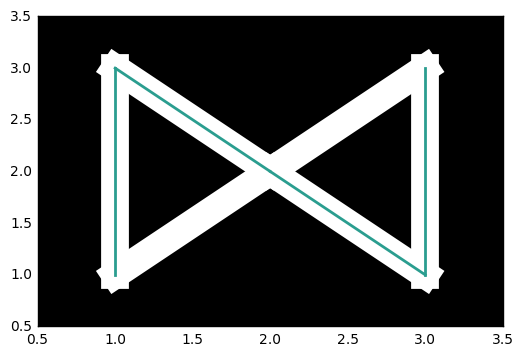

In [13]:
fig, ax = plt.subplots()
plot_parcour(links_example, ax, line_width=20)  # uses the links representation as an input!
ax.set_ylim([0.5, 3.5])
ax.set_xlim([0.5, 3.5])

path_example = [(1, 1), (1, 3), (2, 2), (3, 1), (3, 3)]
add_path(path_example, ax, color=green)

**Assignment 2: A\***

1. Complete the implementation for the A\* algorithm.
2. Some parcours and mazes are given. Use A\* and Dijkstra to find the shortest paths between the lower left corner to the upper right corner. Use the function ```add_path``` to add the path to the figure.
3. Compare running time of the two shortest path algorithms using ```%timeit```.

In [14]:
# functions for computing distances
manhattan_distance = lambda x, y : sum([abs(xi - yi) for xi, yi in zip(x, y)])
euclidean_distance = lambda x, y : sum([(xi - yi)**2 for xi, yi in zip(x, y)])**0.5

In [15]:
from shortestpaths import a_star

In [ ]:
def a_star(graph, source, sink, heuristic):
    """
    Implementation of the A* shortest path algorithm
    Inputs:
        - graph : dict representing the graph
        - source : the source node
        - sink : the sink node (optional)
        - heuristic : a function with the heuristic for the shortest path between two nodes
    Ouput:
        - distance : dict with the distances of the nodes to the source
        - came_from : dict with for each node the previous node in the shortest
                    path from the source
    """
    # COMPLETE THIS (you can start from dijkstra...)
    #...
    

In [16]:
# a parcour, white lines are the routes that can be followed
# find the shortest path from (0, 0) to (99, 99)
parcour = load_links('Data/large_parcour.csv')

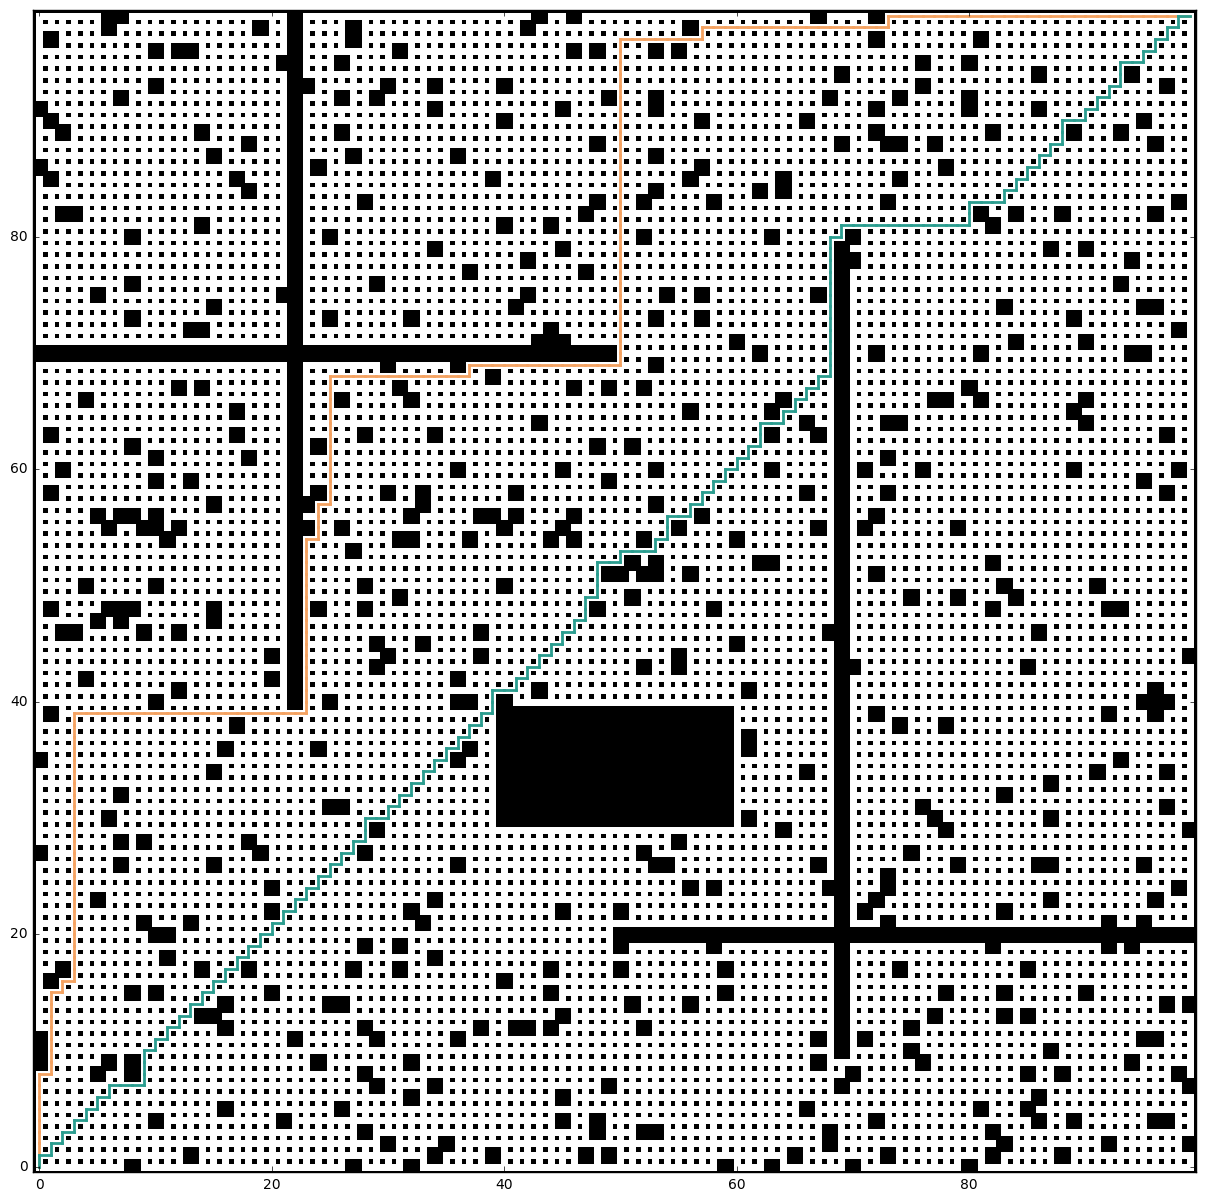

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))

plot_parcour(parcour, ax)
parcour_graph = links_to_graph(parcour)

path_dijkstra, length_dijstra = dijkstra(parcour_graph, (0, 0), (99, 99))
add_path(path_dijkstra, ax, orange)

path_astar, length_astar = a_star(parcour_graph, (0, 0), (99, 99), heuristic=euclidean_distance)
add_path(path_astar, ax, green)

In [18]:
%timeit path_dijkstra, length_dijstra = dijkstra(parcour_graph, (0, 0), (99, 99))

10 loops, best of 3: 40.6 ms per loop


In [19]:
%timeit path_astar, length_astar = a_star(parcour_graph, (0, 0), (99, 99), manhattan_distance)

10 loops, best of 3: 48.5 ms per loop


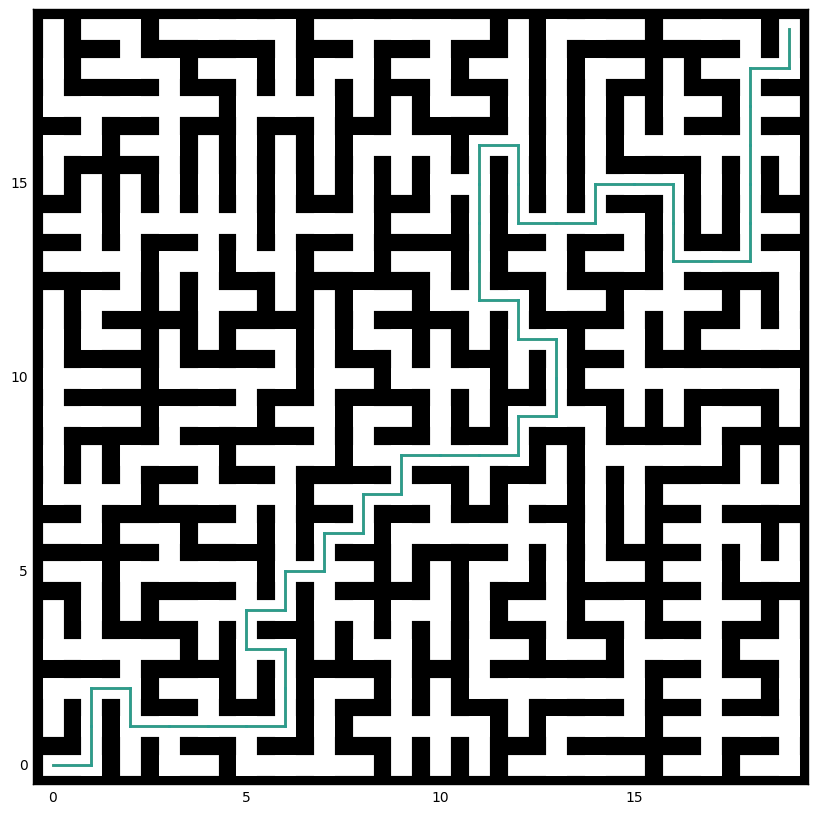

In [20]:
# a small maze, white lines are the routes that can be followed
# find the shortest path from (0, 0) to (99, 99)
small_maze = load_links('Data/small_maze.csv')

fig, ax = plt.subplots(figsize=(10, 10))

plot_parcour(small_maze, ax, line_width=15)
maze_graph = links_to_graph(small_maze)

path_dijkstra, length_dijstra = dijkstra(maze_graph, (0, 0), (19, 19))
add_path(path_dijkstra, ax, orange)

path_astar, length_astar = a_star(maze_graph, (0, 0), (19, 19), euclidean_distance)
add_path(path_astar, ax, green)

In [21]:
%timeit path_dijkstra, length_dijstra = dijkstra(maze_graph, (0, 0), (19, 19))

1000 loops, best of 3: 832 µs per loop


In [22]:
%timeit path_astar, length_astar = a_star(maze_graph, (0, 0), (19, 19), manhattan_distance)

The slowest run took 7.75 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.24 ms per loop


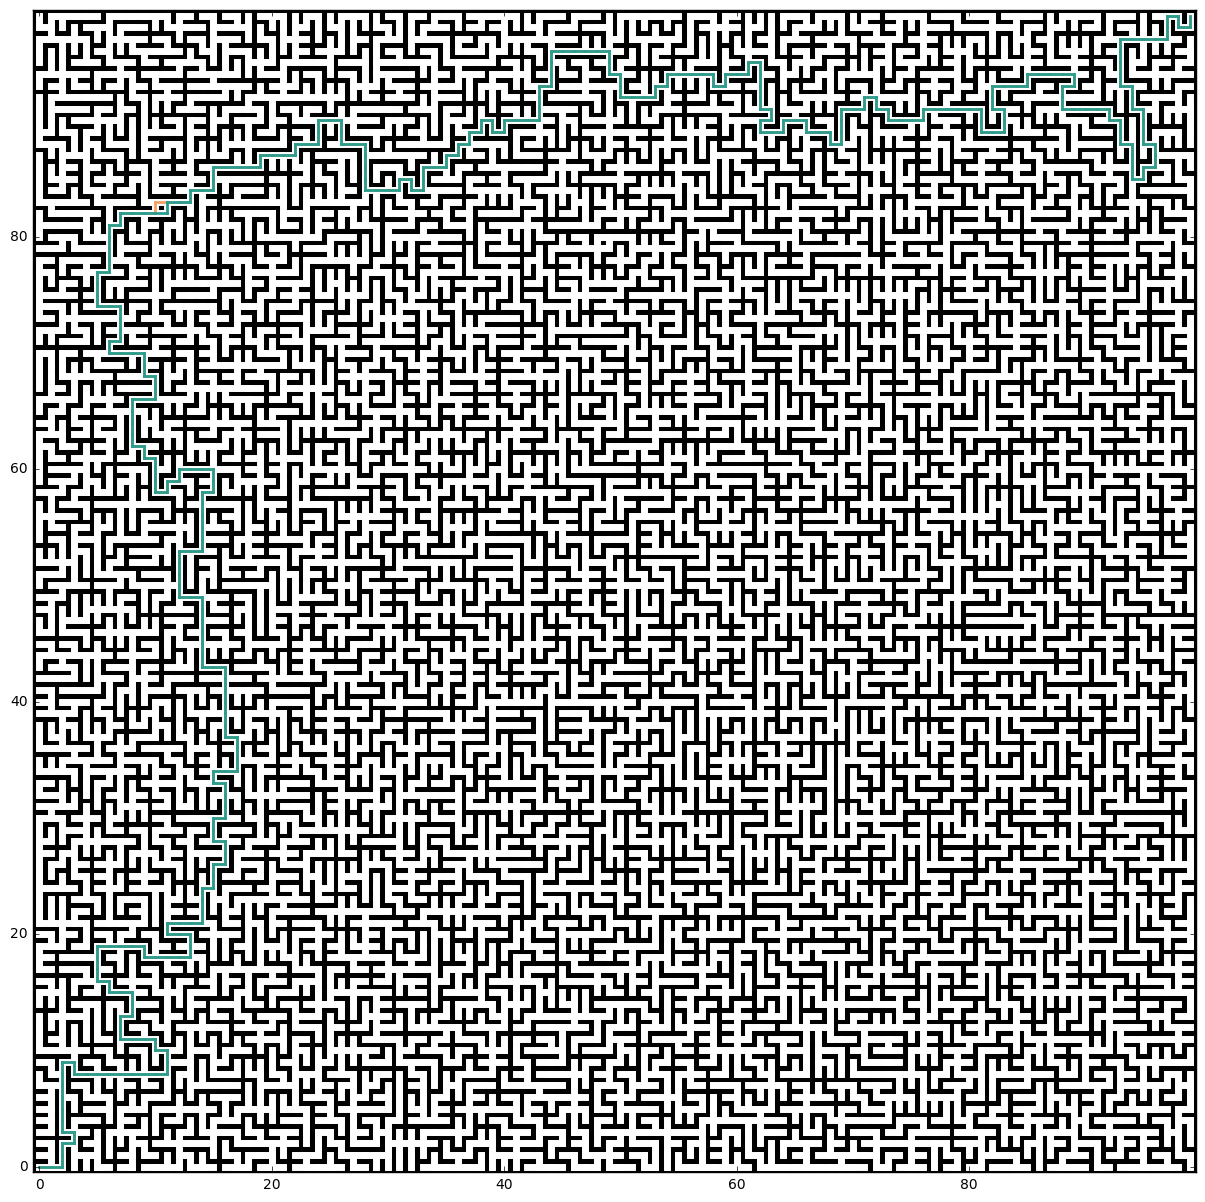

In [23]:
# a small maze, white lines are the routes that can be followed
# find the shortest path from (0, 0) to (99, 99)
large_maze = load_links('Data/large_maze.csv')

fig, ax = plt.subplots(figsize=(15, 15))

plot_parcour(large_maze, ax)
maze_graph = links_to_graph(large_maze)

path_dijkstra, length_dijstra = dijkstra(maze_graph, (0, 0), (99, 99))
add_path(path_dijkstra, ax, orange)

path_astar, length_astar = a_star(maze_graph, (0, 0), (99, 99), euclidean_distance)
add_path(path_astar, ax, green)

In [24]:
%timeit path_dijkstra, length_dijstra = dijkstra(maze_graph, (0, 0), (99, 99))

10 loops, best of 3: 26.3 ms per loop


In [25]:
%timeit path_astar, length_astar = a_star(maze_graph, (0, 0), (99, 99), manhattan_distance)

10 loops, best of 3: 42.3 ms per loop
